<a href="https://colab.research.google.com/github/Melissaydc/Data_Lake-Warehouse/blob/main/Date_WareLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Define o tamanho limite de 600 para a Categ
num_produtos = 600
produtos = {
    "produto_id": range(1, num_produtos + 1),
    "nome": [f"Produto {i}" for i in range(1, num_produtos + 1)],
    "categoria": np.random.choice(["Eletrônicos", "Roupas", "Alimentos"], num_produtos),
}

# Coloca os produtos dentro de um data frame
df_produtos = pd.DataFrame(produtos)

# Cria 1000 vendas
num_vendas = 1000  #
data_vendas = {
    "data": np.random.choice(pd.date_range("2024-04-01", periods=30), num_vendas),  #
    "produto_id": np.random.randint(1, num_produtos + 1, num_vendas),
    "quantidade": np.random.randint(50, 500, num_vendas),  #
    "valor_total": np.random.randint(1000, 10000, num_vendas),  #
}

# Coloca as vendas dentro de um Data Frame
df_vendas = pd.DataFrame(data_vendas)

# Salva as Vendas e os Produtos dentro de arquivos CSV
df_vendas.to_csv("vendas.csv", index=False)
df_produtos.to_csv("produtos.csv", index=False)

# Coloca as informações dos arquivos dentro das variaveis correspondentes
df_vendas = pd.read_csv("vendas.csv")
df_produtos = pd.read_csv("produtos.csv")


# Junta as vendas e os produtos
df_merge = pd.merge(df_vendas, df_produtos, on="produto_id", how="inner")

# Cria um arquivo CSV para armazenar as informações que foram agrupadas
df_merge.to_csv("data_warehouse.csv", index=False)

# Salva em uma variável para poder fazer a leitura do warehouse
df_warehouse = pd.read_csv("data_warehouse.csv")
print("Conteúdo do data_warehouse.csv")
print(df_warehouse)


Conteúdo do data_warehouse.csv
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-11           8         170         1545    Produto 8    Alimentos
1    2024-04-29           8         345         9294    Produto 8    Alimentos
2    2024-04-14           8         223         2332    Produto 8    Alimentos
3    2024-04-19         184         499         1400  Produto 184    Alimentos
4    2024-04-11         184         468         5212  Produto 184    Alimentos
..          ...         ...         ...          ...          ...          ...
995  2024-04-18         238         342         4929  Produto 238       Roupas
996  2024-04-26         100         281         4824  Produto 100  Eletrônicos
997  2024-04-14          76         470         8889   Produto 76  Eletrônicos
998  2024-04-25         398         444         3651  Produto 398    Alimentos
999  2024-04-07         232         163         2623  Produto 232       Roupas

[1000 rows x 6 colum

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1            92         9280
Produto 10         1185        15959
Produto 100         281         4824
Produto 101         146         8164
Produto 102         315         9955
...                 ...          ...
Produto 95          606        15344
Produto 96         2134        32196
Produto 97          444        17340
Produto 98         1107        22322
Produto 99          328         6316

[474 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         92523      1898930
Eletrônicos       88237      1795474
Roupas            92141      1795024

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5248       119450
2024-04-02       12443       250668
2024-04-03        7066       124228
2024-04-04        84

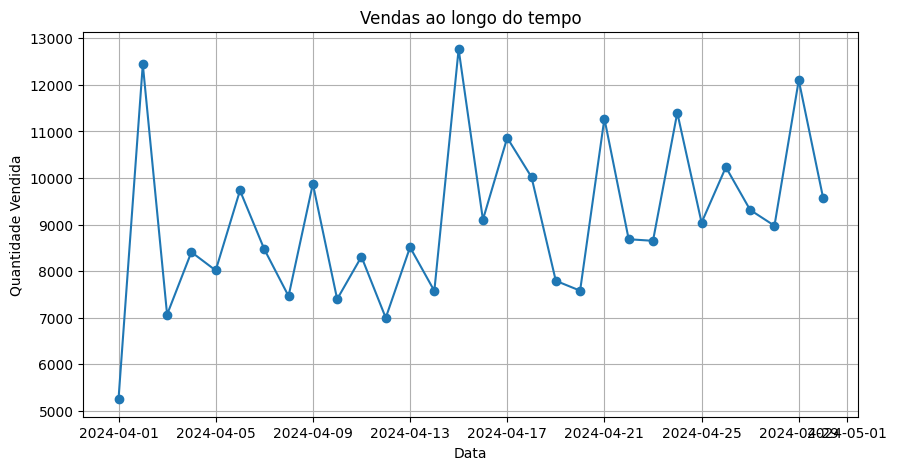


Análise de desempenho de produtos:
nome
Produto 1       9280
Produto 10     15959
Produto 100     4824
Produto 101     8164
Produto 102     9955
               ...  
Produto 95     15344
Produto 96     32196
Produto 97     17340
Produto 98     22322
Produto 99      6316
Name: valor_total, Length: 474, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV e salva como DataFrame
df_warehouse = pd.read_csv('data_warehouse.csv')

# Junta as vendas e produto, depois calcula a quantidade e valor total para cada Produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Mescla as vendas por categoria de produto e calcula a quantidade e valor total vendido para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte a coluna de data para o formato de datetime, junta as vendas por data e calcula a quantidade e valor total vendidod para a cada data
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Cria um gráfico de linha para mostrar as vendas ao longo do tempo
plt.figure(figsize=(10,5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o',linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupa o desempenho de cada produto calculando o valor total vendido para cada um
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [ ]:
import pandas as pd
import numpy as np
import os

# Cria uma pasta para guardar os arquivos
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Limita a 10 arquivos e 1000 linhas
num_files = 10
num_rows_per_file = 1000

# Array vazio
dfs = []

# Loop para criar e salvar os arquivos CSV
for i in range(num_files):

  # Gerador de informações aleatorias por linha
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame com os dados
    df = pd.DataFrame(data)

    # Define o nome do arquivo e salva em CSV
    file_name = f'data_lake/dados{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Adiciona o nome do arquivo e o DataFrame ao array
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Exibe os registros de cada arquivo gerado
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())



Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados1.csv

   coluna1   coluna2 coluna3
0        8  3.192458       A
1       13  1.930371       B
2       60 -0.520959       C
3       61  0.874672       A
4        1  0.877367       B

Dados do arquivo: data_lake/dados2.csv

   coluna1   coluna2 coluna3
0        2 -0.488379       A
1       26  0.089743       C
2       86 -0.696477       A
3       84 -0.519577       A
4       92  0.208839       C

Dados do arquivo: data_lake/dados3.csv

   coluna1   coluna2 coluna3
0       84  1.516826       C
1       23  0.139768       A
2       76 -0.409842       B
3       58 -0.578990       B
4       60 -2.161057       A

Dados do arquivo: data_lake/dados4.csv

   coluna1   coluna2 coluna3
0       44  1.149137       C
1       11  0.717285       C
2       14  0.256632       C
3       96 -1.196977       C
4       31  0.210646       C

Dados do arquivo: data_lake/dados5.csv

   coluna1   coluna2 coluna3
0       37  1.601939       C
1

Primeiras linas do DataFrame:
   coluna1   coluna2 coluna3
0       66 -0.147832       C
1       49 -0.098706       A
2       23  0.704415       A
3        7  0.664331       B
4       44 -2.031151       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.235000    -0.047975
std      28.947742     0.971432
min       0.000000    -2.874904
25%      25.000000    -0.701590
50%      51.000000    -0.043779
75%      76.000000     0.666082
max      99.000000     2.698981


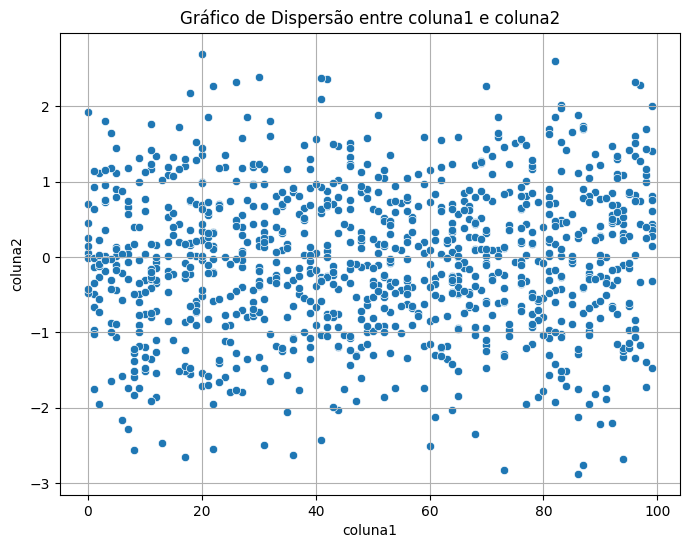

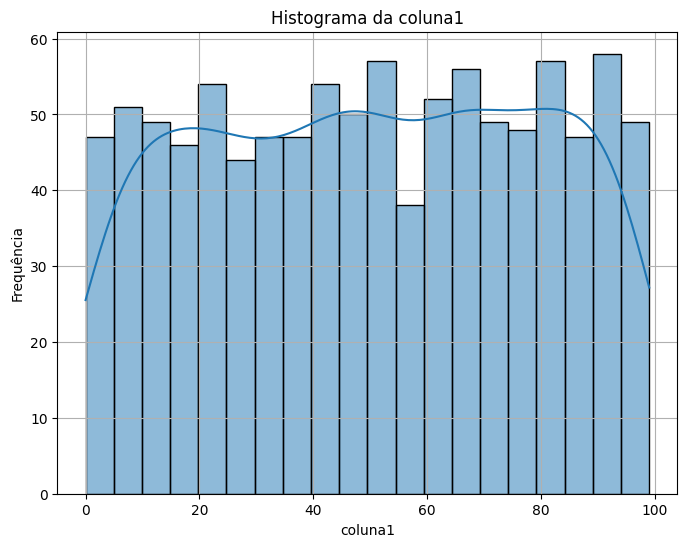

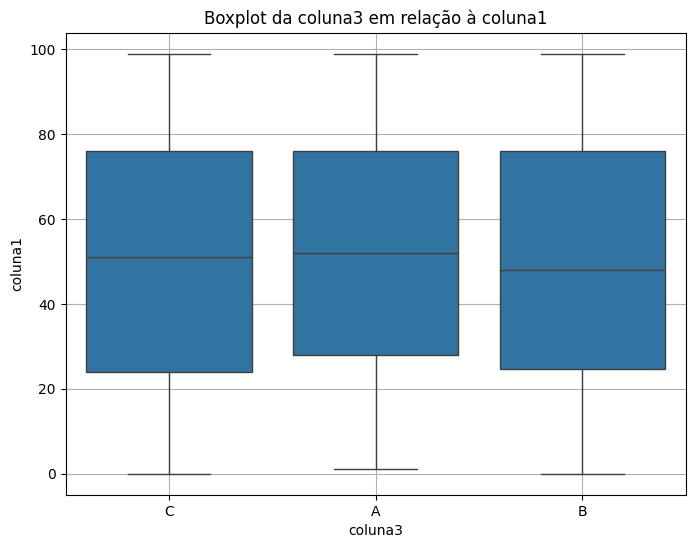

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados SQLite
#conn_string = 'sqlite:///data_lake.db'
#engine = create_engine(conn_string)

# Nome da tabela a ser lida do banco de dados
#table_name = 'dados_1'

# Lê os dados da tabela 'dados_1' do banco de dados para um dataframe
#df = pd.read_sql_table(table_name, engine)

# Imprime as primeiras linhas do dataframe
print("Primeiras linas do DataFrame:")
print(df.head())

# Imprimei informações sobre o dataframe (tipo de dados, valores nulos, etc.)
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprime um resumo estatístico do dataframe (contagem, média, desvio padrão, etc.)
print("\nResumo estatístico do DataFrame:")
print(df.describe())

#
# Plota um gráfico de dispersão entre 'coluna1' e 'coluna2' usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plota um histograma da coluna 'coluna1' usando seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Plota um boxplot da 'coluna1' em relação à 'coluna3' usando seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()